# BigMart Case Study


The data scientists had collected sales data from 1531 products across 8 stores in different cities for the year 2018. Also each product has certain attributes that sets it apart from other products.
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Item_Identifier</td>
      <td>Unique product ID</td>
    </tr>
    <tr>
      <td>Item_Weight</td>
      <td>Weight of product</td>
    </tr>
     <tr>
      <td>Item_Fat_Content</td>
      <td>Checks the Concentration of fat in the product</td>
    </tr>
    <tr>
      <td>Item_Visibility</td>
      <td>The % of total display area of all similar products in a store</td>
    </tr>
     <tr>
      <td>Item_Type</td>
      <td>Product Category</td>
    </tr>
    <tr>
      <td>Item_MRP</td>
      <td>Maximum Retail Price for a Product</td>
    </tr>
    <tr>
      <td>Outlet_Identifier</td>
      <td>Store ID</td>
    </tr>
     <tr>
      <td>Outlet_Establishment_Year</td>
      <td>The year in which store was established</td>
    </tr>
    <tr>
      <td>Outlet_Size</td>
      <td>The size of the store (Area Size Category)</td>
    </tr>
     <tr>
      <td>Outlet_Location_Type</td>
      <td>In Terms of city Tiers (Size)</td>
    </tr>
    <tr>
      <td>Outlet_Type</td>
      <td>Weight of product</td>
    </tr>
     <tr>
      <td>Item_Identifier</td>
      <td>Grocery store or a type of supermarket</td>
    </tr>
    <tr>
      <td>Item_Outlet_Sales</td>
      <td>Sales of the product In the Specific outlet</td>
    </tr>   
  </tbody>
</table>

# Details of BigMart Case Study

BigMart will try to understand the properties of products and stores which play a key role in increasing sales. 
## Case 1 : For a store outlet OUT035 and OUT045, determine 
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 2 : For supermarket type 1 store, determine 
    a)	Whether the location of store in Tier1,Tier2 and Tier3 has any impact on the sales of the product in that store?
    b)	Whether the size of the store (Low, Medium and High) has any impact on the sales of the product in that store?
    c)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?
## Case 3 : For Tier 1 stores, determine
    a)	Whether concentration of fat content in the product affect the sales of the products?
    b)	Whether item visibility, item MRP, item weight and fat concentration has any impact on the sales of the products?


### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
df = pd.read_excel('data/BigMart_Data.xlsx')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,4706,3932.000000,4706,4706.000000,4706,4706.000000,4706,4706.000000,3348,4706,4706,4706.000000
unique,1526,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDR43,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,8,NaN,2830,NaN,689,NaN,531,NaN,1502,1834,3134,NaN
mean,NaN,12.955654,NaN,0.066001,NaN,140.743798,NaN,1997.864003,NaN,NaN,NaN,2177.914990
std,NaN,4.655408,NaN,0.051338,NaN,62.387107,NaN,8.299149,NaN,NaN,NaN,1700.556703
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.895000,NaN,0.026950,NaN,93.236350,NaN,1987.000000,NaN,NaN,NaN,838.908000
50%,NaN,12.800000,NaN,0.054367,NaN,142.614100,NaN,1999.000000,NaN,NaN,NaN,1789.670400
75%,NaN,17.100000,NaN,0.094276,NaN,186.083850,NaN,2004.000000,NaN,NaN,NaN,3083.985600


<b> Finding from the Describe</b>

1. Item Weight and Outlet_Size have some missing values because the count is less than total rows.
2. Item_Fat_content have 5 unique values.
3. Item_Type have 16 unique values(which is mensioned in the pblm stmt.
4. Outlet_Identifier have 10 unique values.
5. Outlet_Size and Outlet_Location_Type have 3 unique Values.
6. Outlet_Type have 4 unique values.
7. Minimum value of Item_Visibility is 0 but it is not possible so we will treat it as the NULL value.
8. Variance is very less is Item Visibility and high in Item_MRP also Item_Outlet_Sales.
9. Some outliers are present in the dataset (difference b/w min, max and interquartile range are unequal.
10. Item_Weight is a numerical value so we can substitute the MEAN value to fill the missing values.
11. Outlet_Size is a categorical value so we can use the MODE for missing value.
* There are 1531 products mentioned in the problem statement but we only have the infromation about 1526.

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Exploratory Analysis

#### Finding the missing values

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   774
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1358
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Two attribute have missing values ('Item Weight' and 'Outlet_Size')

## Visualzing the data

### 1. Visualzing  Item_Visibility and Item_Outlet_Sales

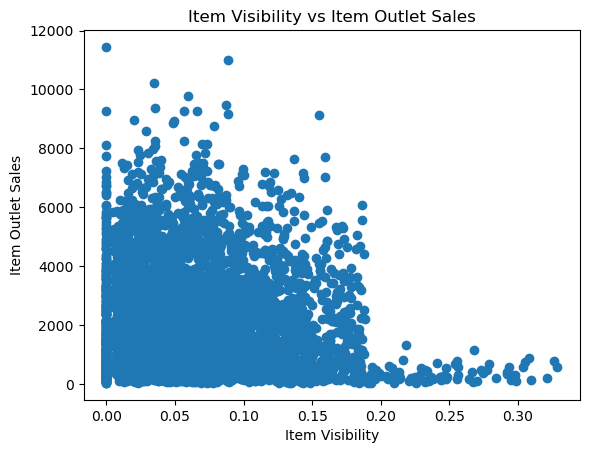

In [6]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Item Visibility vs Item Outlet Sales")

plt.show()

<b> We can see that, Items having visibility less than 0.2 sold most </b>

### 2. Visualizing the relationship b/w Outlet and Sales.

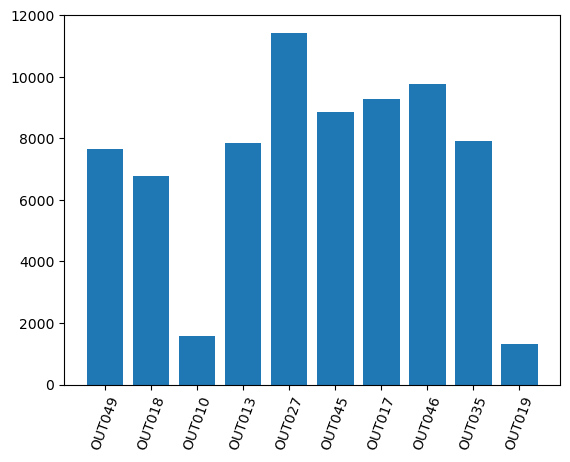

In [7]:
plt.bar(df.Outlet_Identifier,df.Item_Outlet_Sales)
plt.xticks(rotation = 70)
plt.show()

Lets check the outliers also

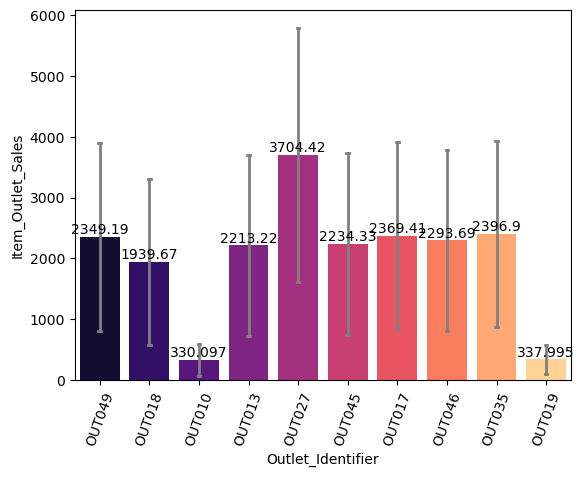

In [8]:
ax=sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales', data=df ,palette='magma',
            capsize = 0.05,saturation = 8,errcolor = 'gray', errwidth = 2,ci = 'sd')
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 70)

plt.show()

In the above plot, we can find the top most and least contributed outlets
* Top 3 Contributors   : OUT027,OUT035 and OUT017
* Least 3 Contributors : OUT010,OUT019 and OUT018

### 3. Item_Type and Sales 

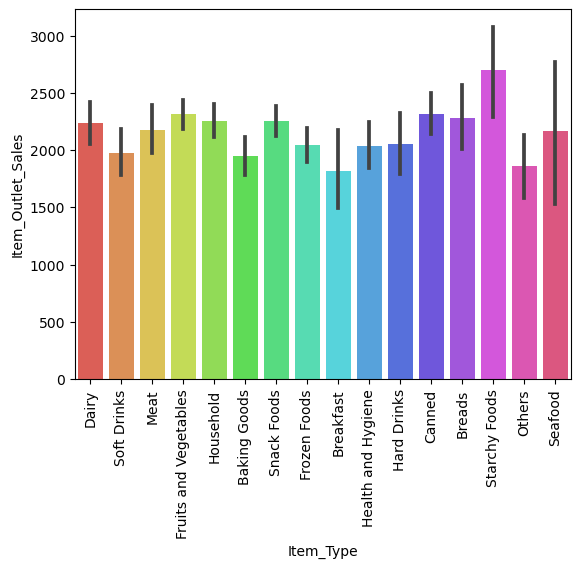

In [9]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df,palette='hls',saturation=8)
plt.xticks(rotation=90)
plt.show()

The most sold item type is <b> Starchy Foods </b>.

#### Finding the outliers of the each item type.

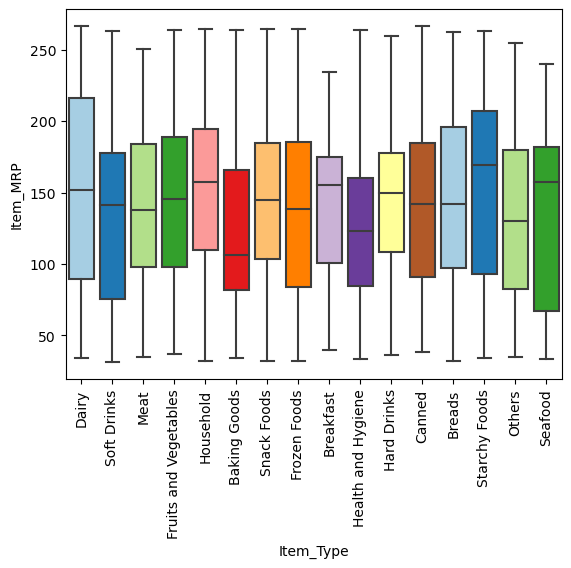

In [10]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=df,palette='Paired',saturation=8)
plt.xticks(rotation=90)
plt.show()

No outliers in the item types.

### 4.  Item_Fat_Content and MRP.

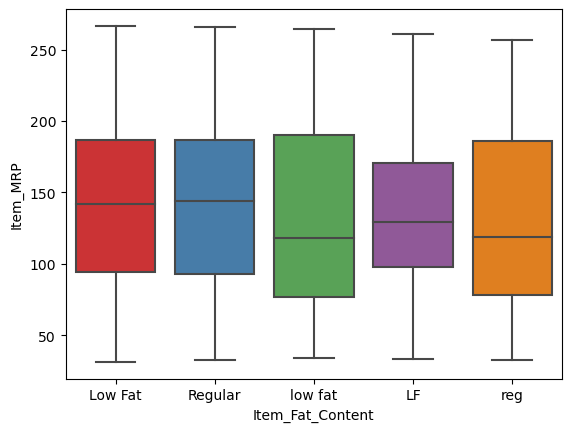

In [11]:
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df, palette="Set1")
plt.show()

Here we can see the Low Fat and low fat and LF are Low Fat.

Also, Regular and reg are Regular.

#### Finding the unique values

### 1. Finding the Item Weight Missing Values.

In [12]:
df["Item_Weight"].describe()

count    3932.000000
mean       12.955654
std         4.655408
min         4.555000
25%         8.895000
50%        12.800000
75%        17.100000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
# filling NAN value with mean group by the Item_Identifier                 
df["Item_Weight"].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'), inplace = True)
print("After Filling Item Weight using Item_Identifier",df["Item_Weight"].isnull().sum())
df["Item_Weight"].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace = True)
print("After Filling Item Weight using Item_Type",df["Item_Weight"].isnull().sum())


After Filling Item Weight using Item_Identifier 34
After Filling Item Weight using Item_Type 0


### 2. Cleaning the Item_Visibility Values



Each Outlet type have same pattern of Item Visibility. 

Every item have placed same or near. So we can take mean of Item_Visibility of Item_Identifier group by Outlet_Type for filling the NAN values.

Also every items of each Item_Type place together or near to each other (like fruits and vegtables are placed together , drinks, electric items etc) so we can take the mean of the Item_visibility of item_Type group by outlet type.

In [14]:
# filling NAN value with mean group by the Item_Identifier   and Outlet_Type              
df["Item_Visibility"]=df["Item_Visibility"].replace(0,np.nan)
print("Before Filling Item_Visibility : ",df["Item_Visibility"].isnull().sum())
df["Item_Visibility"].fillna(df.groupby(['Item_Identifier','Outlet_Type'])['Item_Visibility'].transform('mean'), inplace = True)
print("After Filling Item_Visibility tusing groupby ['Item_Identifier','Outlet_Type'] : ",df["Item_Visibility"].isnull().sum())
# filling NAN value with mean group by the Item_Type and Outlet_Type            
df["Item_Visibility"].fillna(df.groupby(['Item_Type','Outlet_Type'])['Item_Visibility'].transform('mean'), inplace = True)
print("After Filling Item_Visibility using groupby ['Item_Type','Outlet_Type'] : ",df["Item_Visibility"].isnull().sum())


Before Filling Item_Visibility :  284
After Filling Item_Visibility tusing groupby ['Item_Identifier','Outlet_Type'] :  115
After Filling Item_Visibility using groupby ['Item_Type','Outlet_Type'] :  0


In [15]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.122143
4       0.013217
          ...   
4701    0.087159
4702    0.027756
4703    0.092590
4704    0.029569
4705    0.077428
Name: Item_Visibility, Length: 4706, dtype: float64

### 3 . Filling the Outlet_Size NAN values

Outlet Size depends on outlet type and the location of the outlet.

In [16]:
crosstable=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,530,0,0
Medium,0,508,488,506
Small,268,1048,0,0


<b> Here we can see, that all the grocery stores are small types, that is true.</b>
    
 <b>   So we are going to mapping the grocery store and small size.</b>

Change the NAN Value of Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.


In [17]:
df.Outlet_Size.value_counts()

Medium    1502
Small     1316
High       530
Name: Outlet_Size, dtype: int64

In [18]:
Outlet_dic={'Grocery Store' : 'Small'}
outlet_map= df.Outlet_Type.map(Outlet_dic)
df.Outlet_Size=df.Outlet_Size.combine_first(outlet_map)
df.Outlet_Size.value_counts()

Small     1626
Medium    1502
High       530
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Size'].isnull().sum(axis=0)

1048

Mostly seen that outlet size varies with location of outlet.

In [20]:
crosstable=pd.crosstab(df['Outlet_Size'],df['Outlet_Location_Type'])
crosstable

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,530
Medium,508,0,994
Small,795,521,310


<b> Here we can see, all the Tier 2 stores are of small types. </b>

<b> So mapping Tier 2 store and small size. </b>

In [21]:
Outlet_dic={'Tier 2' : 'Small'}
outlet_map= df.Outlet_Location_Type.map(Outlet_dic)
df.Outlet_Size=df.Outlet_Size.combine_first(outlet_map)
df.Outlet_Size.value_counts()

Small     2674
Medium    1502
High       530
Name: Outlet_Size, dtype: int64

In [22]:
df['Outlet_Size'].isnull().sum(axis=0)

0

### Checking Categorical Values

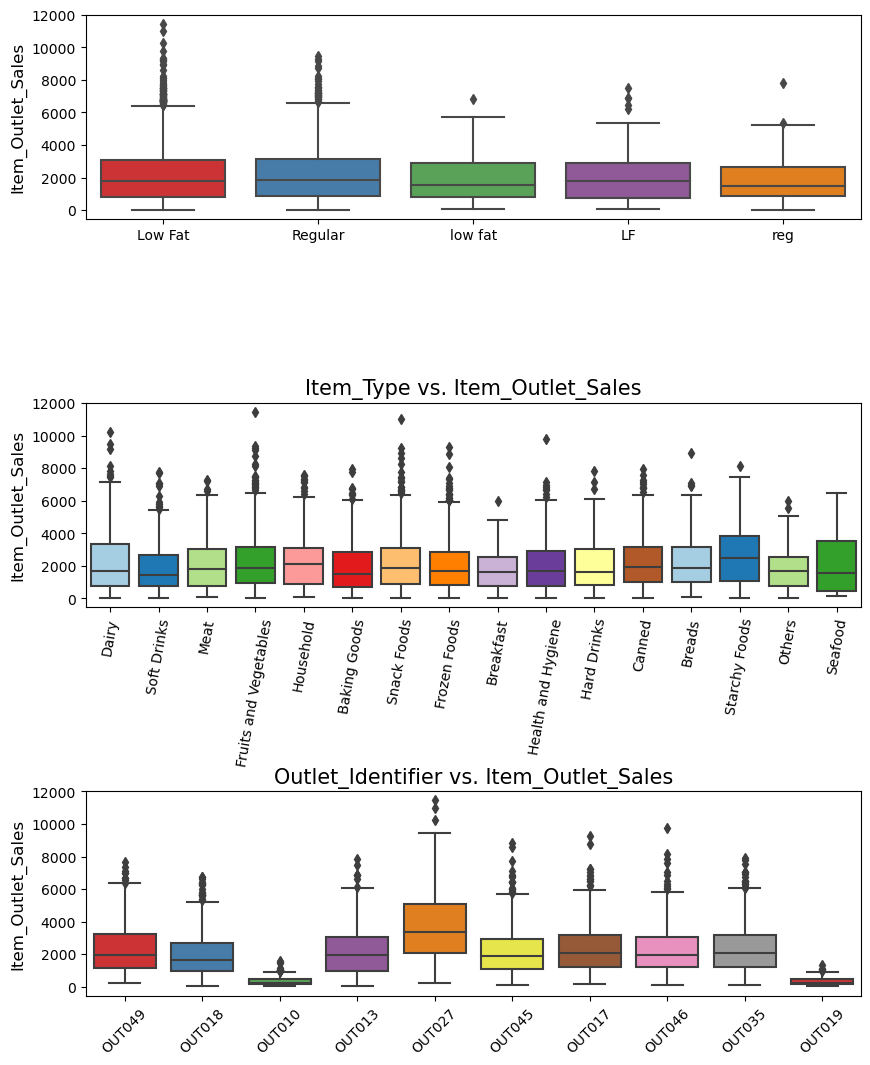

In [23]:
plt.figure(figsize = (10,9))
plt.subplot(311)
ax=sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

#plt.figure(figsize = (10,9))
plt.subplot(312)
ax=sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Paired",saturation=8)
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust( hspace = 0.9,top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=80)

plt.subplot(313)
ax=sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(wspace = 0.4, hspace = 0.9,top = 1.2)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()


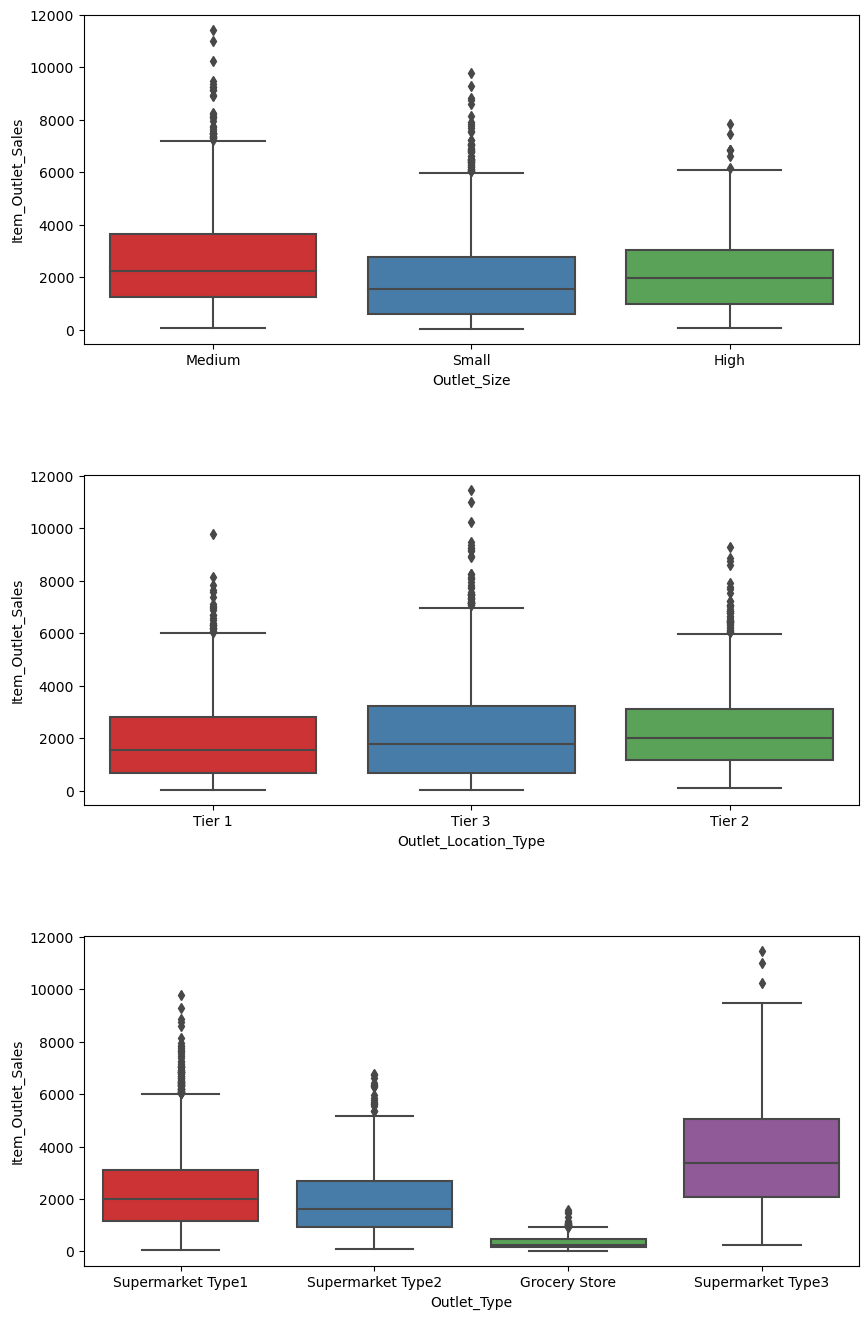

In [24]:
plt.figure(figsize = (10,9))
plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### 4 . Creating new Feature

Item_type Variable has 16 categories which is very useful for analysis. So its a good idea to combine them. For this , when we look into the Item_Identifier, it start with either FD,DR or NC. If we check this categories, these look like Food,Drink and Non-Consumables. So we can use the Item_Identifier to create a feature Called Item_Category.

In [25]:
# str[:n] is used to get first n characters of column in pandas.
# map is used to substitute each value in a Series with another value

df['Item_Category']=df['Item_Identifier'].str[:2].map({'FD' : 'Food',
                                                       'NC' : 'Non-Consumable',
                                                       'DR' : 'Drinks'})
df['Item_Category'].value_counts()
df[['Item_Category','Item_Type']]

,Item_Category,Item_Type
0,Food,Dairy
1,Drinks,Soft Drinks
2,Food,Meat
3,Food,Fruits and Vegetables
4,Non-Consumable,Household
...,...,...
4701,Food,Dairy
4702,Food,Baking Goods
4703,Non-Consumable,Household
4704,Non-Consumable,Household


### 5. Modify the Item_Fat_Content

When we check the Item_Fat_Content vs Outlet_Sales box chart, we found out thier is some typo error.
This can be corrected as : Low Fat,low fat, LF as same which is Low Fat,Regular and reg are same.

In [26]:
print("Unique Values ",df['Item_Fat_Content'].nunique())
df['Item_Fat_Content'] =df['Item_Fat_Content'].replace({ 'LF' : 'Low Fat',
                                                         'reg' : 'Regular',
                                                          'low fat' : 'Low Fat'})
print("After Modifying Unique Values ",df['Item_Fat_Content'].nunique())

print(df['Item_Fat_Content'].value_counts())

Unique Values  5
After Modifying Unique Values  2
Low Fat    3058
Regular    1648
Name: Item_Fat_Content, dtype: int64


In the above, when creating new category 'Item_Category' we saw that it contains <b>Non-Consumable</b>. But we now a fat-content should not be specified for them. So we need to create seperate category for such kind of observations. So we will chage the Item_Fat_Content for Non-Consumable as <b>Non-Edible</b>.

In [27]:
df.loc[df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()


Low Fat       2215
Regular       1648
Non-Edible     843
Name: Item_Fat_Content, dtype: int64

In [28]:
#import dtale

In [29]:
#dtale.show(df)

## EDA using klib Library

In [30]:
!pip install klib

In [31]:
import klib

GridSpec(6, 8)

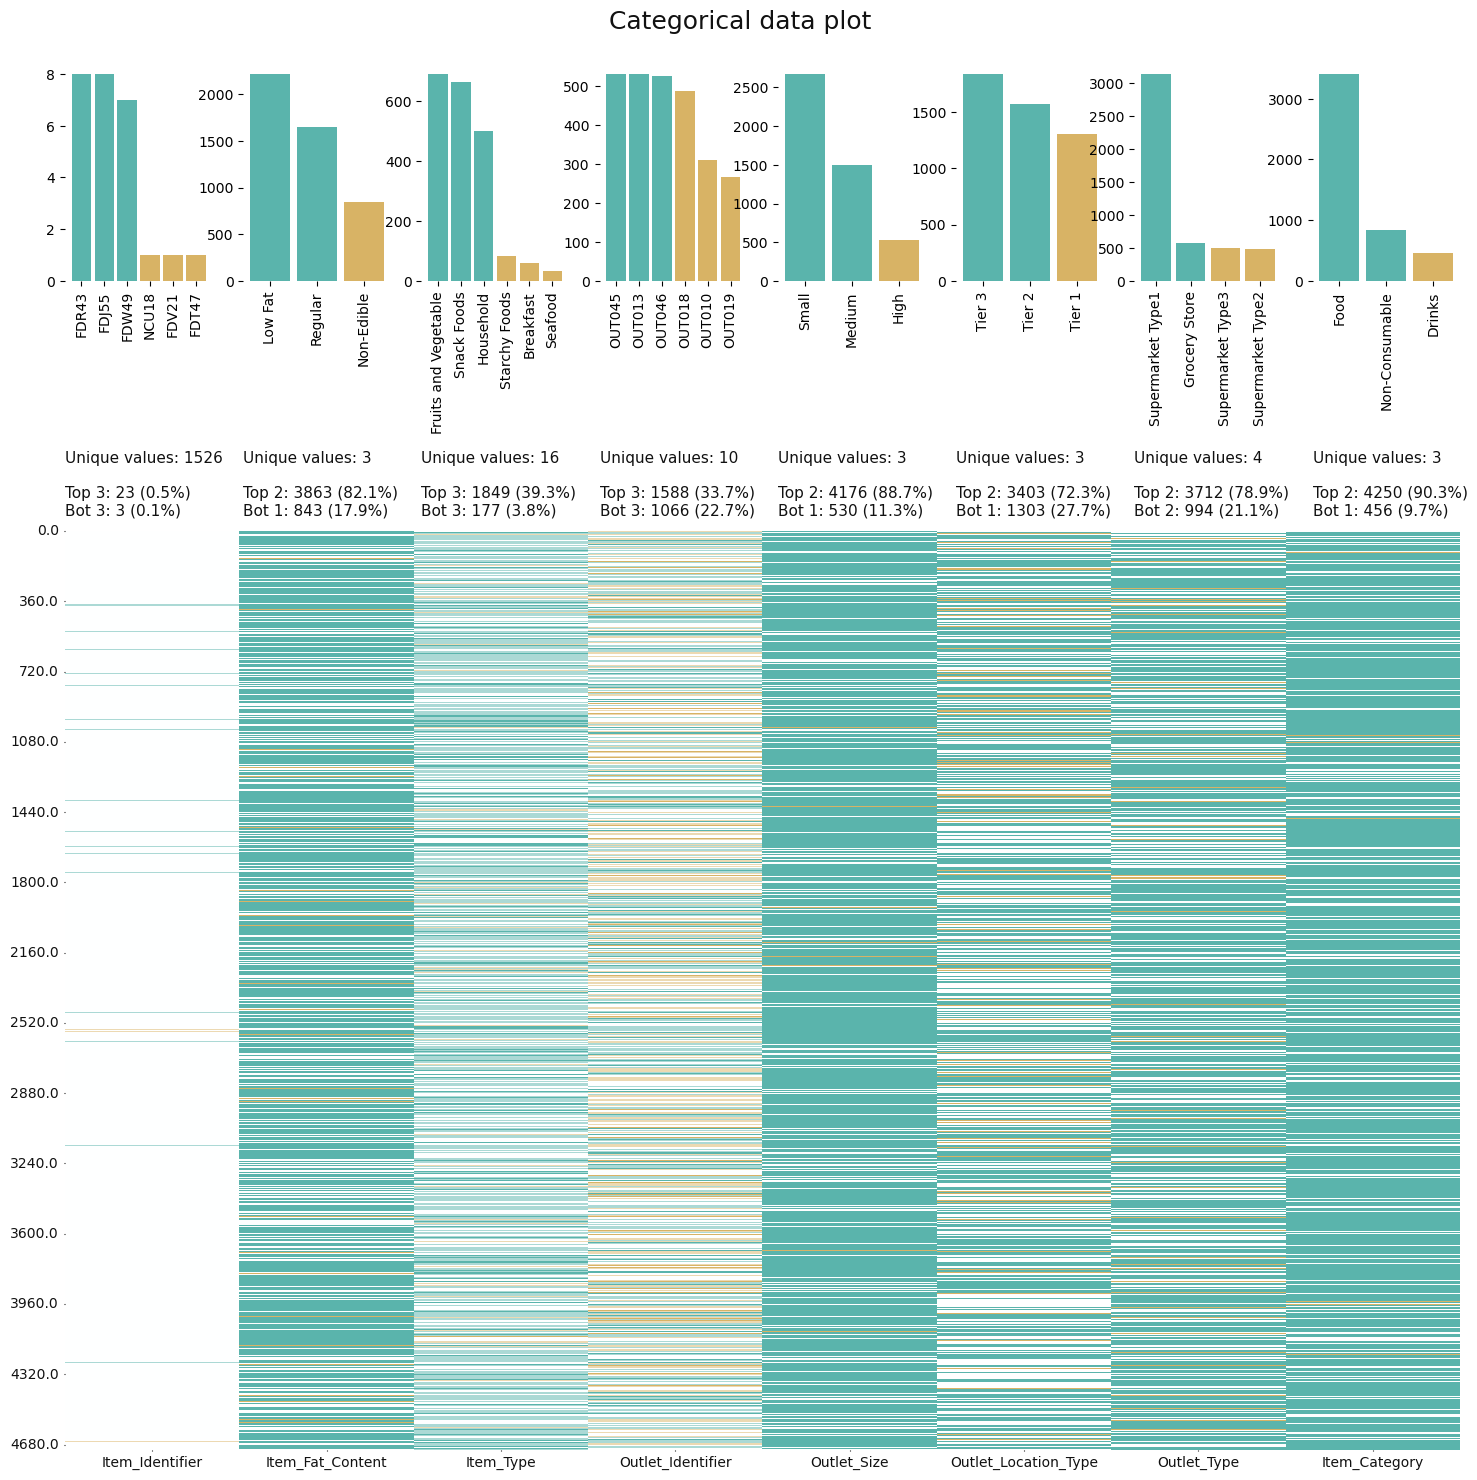

In [32]:
klib.cat_plot(df)

In [33]:
#klib.corr_mat(df)

### Data Cleaning

In [34]:
klib.convert_datatypes(df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809204,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.137939,Food
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269199,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422791,Drinks
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.617996,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270020,Food
3,FDX07,19.200001,Regular,0.122143,Fruits and Vegetables,182.095001,OUT010,1998,Small,Tier 3,Grocery Store,732.380005,Food
4,NCD19,8.930000,Non-Edible,0.013217,Household,53.861401,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.250000,Low Fat,0.087159,Dairy,95.140999,OUT035,2004,Small,Tier 2,Supermarket Type1,2220.443115,Food
4702,FDS48,15.150000,Low Fat,0.027756,Baking Goods,150.470795,OUT013,1987,High,Tier 3,Supermarket Type1,2106.591309,Food
4703,NCH07,13.150000,Non-Edible,0.092590,Household,159.560394,OUT013,1987,High,Tier 3,Supermarket Type1,1901.524780,Non-Consumable
4704,NCK54,12.150000,Non-Edible,0.029569,Household,117.614998,OUT013,1987,High,Tier 3,Supermarket Type1,1514.694946,Non-Consumable


In [35]:
 klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.122143,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,Small,Tier 2,Supermarket Type1,2220.4430,Food
4702,FDS48,15.15,Low Fat,0.027756,Baking Goods,150.4708,OUT013,1987,High,Tier 3,Supermarket Type1,2106.5912,Food
4703,NCH07,13.15,Non-Edible,0.092590,Household,159.5604,OUT013,1987,High,Tier 3,Supermarket Type1,1901.5248,Non-Consumable
4704,NCK54,12.15,Non-Edible,0.029569,Household,117.6150,OUT013,1987,High,Tier 3,Supermarket Type1,1514.6950,Non-Consumable


In [36]:
klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information


,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,pooled_vars
0,FDA15,9.30,0.016047,249.8092,3735.1380,0
1,DRC01,5.92,0.019278,48.2692,443.4228,1
2,FDN15,17.50,0.016760,141.6180,2097.2700,2
3,FDX07,19.20,0.122143,182.0950,732.3800,3
4,NCD19,8.93,0.013217,53.8614,994.7052,4
...,...,...,...,...,...,...
4701,FDA50,16.25,0.087159,95.1410,2220.4430,19
4702,FDS48,15.15,0.027756,150.4708,2106.5912,267
4703,NCH07,13.15,0.092590,159.5604,1901.5248,4
4704,NCK54,12.15,0.029569,117.6150,1514.6950,4


## Dealing with Categorical Variables

#### Label Encoding 

We need to encode categorical data 
In this data set we have 2 type of categorical data:
* Nominal Categorical data
    - Item_Identifier(not using in this data for any model)
    - Item_Type
    - Outlet_Identifier
    - Item_Category
    - Item_Fat_Content
* Ordinal Categorical data
    - Outlet_Size
    - Outlet_Location_Type
    - Outlet_Type
    
 we can use one-hot encoding for the categorical data and OrdinalEncoding for ordinal data

##### Ordinal Encoding:

In [37]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

###### 1.Encoding Outlet_Size

In [38]:
df['Outlet_Size'].value_counts()


Small     2674
Medium    1502
High       530
Name: Outlet_Size, dtype: int64

In [39]:
#creating object of OrdinalEncoding

mapping = [
    {
        'col':'Outlet_Size',
        'mapping':{
            'High':1,
            'Medium':2,
            'Small':3
        }
    }
]
encoder = ce.OrdinalEncoder(cols='Outlet_Size',return_df=True,
                          mapping=mapping)

In [40]:
#fit and transform train data
#le = LabelEncoder()
data = df
data['Outlet_Size']=encoder.fit_transform(df[['Outlet_Size']])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.122143,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.013217,Household,53.8614,OUT013,1987,1,Tier 3,Supermarket Type1,994.7052,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,Low Fat,0.087159,Dairy,95.1410,OUT035,2004,3,Tier 2,Supermarket Type1,2220.4430,Food
4702,FDS48,15.15,Low Fat,0.027756,Baking Goods,150.4708,OUT013,1987,1,Tier 3,Supermarket Type1,2106.5912,Food
4703,NCH07,13.15,Non-Edible,0.092590,Household,159.5604,OUT013,1987,1,Tier 3,Supermarket Type1,1901.5248,Non-Consumable
4704,NCK54,12.15,Non-Edible,0.029569,Household,117.6150,OUT013,1987,1,Tier 3,Supermarket Type1,1514.6950,Non-Consumable


###### 3. Encoding Outlet_Location_Type

In [41]:
#creating object of OrdinalEncoding
mapping = [
    {
        'col':'Outlet_Location_Type',
        'mapping':{
            'Tier 1':1,
            'Tier 2':2,
            'Tier 3':3
        }
    }
]
encoder = ce.OrdinalEncoder(cols='Outlet_Location_Type',return_df=True,
                          mapping=mapping)

In [42]:
data['Outlet_Location_Type']=encoder.fit_transform(df[['Outlet_Location_Type']])
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,Supermarket Type1,3735.1380,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,Supermarket Type1,2097.2700,Food
3,FDX07,19.200,Regular,0.122143,Fruits and Vegetables,182.0950,OUT010,1998,3,3,Grocery Store,732.3800,Food
4,NCD19,8.930,Non-Edible,0.013217,Household,53.8614,OUT013,1987,1,3,Supermarket Type1,994.7052,Non-Consumable
5,FDP36,10.395,Regular,0.077312,Baking Goods,51.4008,OUT018,2009,2,3,Supermarket Type2,556.6088,Food
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,1,3,Supermarket Type1,343.5528,Food
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,2,3,Supermarket Type3,4022.7636,Food
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,3,2,Supermarket Type1,1076.5986,Food
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,3,2,Supermarket Type1,4710.5350,Food


###### 3. Encoding Outlet_Type

In [43]:
#creating object of OrdinalEncoding
mapping = [
    {
        'col':'Outlet_Type',
        'mapping':{
            'Grocery Store':0,
            'Supermarket Type1' : 1,
            'Supermarket Type2' : 2,
            'Supermarket Type3' : 3
        }
    }
]
encoder = ce.OrdinalEncoder(cols='Outlet_Type',return_df=True,
                          mapping=mapping)

In [44]:
data=encoder.fit_transform(df)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4706 non-null   object 
 1   Item_Weight                4706 non-null   float64
 2   Item_Fat_Content           4706 non-null   object 
 3   Item_Visibility            4706 non-null   float64
 4   Item_Type                  4706 non-null   object 
 5   Item_MRP                   4706 non-null   float64
 6   Outlet_Identifier          4706 non-null   object 
 7   Outlet_Establishment_Year  4706 non-null   int64  
 8   Outlet_Size                4706 non-null   int32  
 9   Outlet_Location_Type       4706 non-null   int32  
 10  Outlet_Type                4706 non-null   int32  
 11  Item_Outlet_Sales          4706 non-null   float64
 12  Item_Category              4706 non-null   object 
dtypes: float64(4), int32(3), int64(1), object(5)
mem

##### One Hot Encoding
###### 1. Encoding Item_Fat_Content using OneHotEncoder

In [46]:
import category_encoders as ce

In [47]:
# instantiate our encoder

encoder = ce.OneHotEncoder(cols='Item_Fat_Content',use_cat_names=True)

In [48]:
data = encoder.fit_transform(data)


In [49]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_Non-Edible,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.300,1,0,0,0.016047,Dairy,249.8092,OUT049,1999,2,1,1,3735.1380,Food
1,DRC01,5.920,0,1,0,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2,443.4228,Drinks
2,FDN15,17.500,1,0,0,0.016760,Meat,141.6180,OUT049,1999,2,1,1,2097.2700,Food
3,FDX07,19.200,0,1,0,0.122143,Fruits and Vegetables,182.0950,OUT010,1998,3,3,0,732.3800,Food
4,NCD19,8.930,0,0,1,0.013217,Household,53.8614,OUT013,1987,1,3,1,994.7052,Non-Consumable
5,FDP36,10.395,0,1,0,0.077312,Baking Goods,51.4008,OUT018,2009,2,3,2,556.6088,Food
6,FDO10,13.650,0,1,0,0.012741,Snack Foods,57.6588,OUT013,1987,1,3,1,343.5528,Food
7,FDP10,19.000,1,0,0,0.127470,Snack Foods,107.7622,OUT027,1985,2,3,3,4022.7636,Food
8,FDH17,16.200,0,1,0,0.016687,Frozen Foods,96.9726,OUT045,2002,3,2,1,1076.5986,Food
9,FDU28,19.200,0,1,0,0.094450,Frozen Foods,187.8214,OUT017,2007,3,2,1,4710.5350,Food


###### 2. Encoding Item_Category              

In [50]:
encoder = ce.OneHotEncoder(cols='Item_Category',use_cat_names=True)

In [51]:
data = encoder.fit_transform(data)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Item_Identifier               4706 non-null   object 
 1   Item_Weight                   4706 non-null   float64
 2   Item_Fat_Content_Low Fat      4706 non-null   int64  
 3   Item_Fat_Content_Regular      4706 non-null   int64  
 4   Item_Fat_Content_Non-Edible   4706 non-null   int64  
 5   Item_Visibility               4706 non-null   float64
 6   Item_Type                     4706 non-null   object 
 7   Item_MRP                      4706 non-null   float64
 8   Outlet_Identifier             4706 non-null   object 
 9   Outlet_Establishment_Year     4706 non-null   int64  
 10  Outlet_Size                   4706 non-null   int32  
 11  Outlet_Location_Type          4706 non-null   int32  
 12  Outlet_Type                   4706 non-null   int32  
 13  Ite

##### One Hot Encoding using dummy variable

###### Encoding Item_Type                  

In [53]:
dummies1 = pd.get_dummies(data.Item_Type)
dummies1

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4702,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4703,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4704,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
data = pd.concat([data,dummies1],axis = 'columns')
data

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_Non-Edible,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.30,1,0,0,0.016047,Dairy,249.8092,OUT049,1999,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,0,1,0,0.019278,Soft Drinks,48.2692,OUT018,2009,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,1,0,0,0.016760,Meat,141.6180,OUT049,1999,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,0,1,0,0.122143,Fruits and Vegetables,182.0950,OUT010,1998,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0,1,0.013217,Household,53.8614,OUT013,1987,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,FDA50,16.25,1,0,0,0.087159,Dairy,95.1410,OUT035,2004,...,0,0,0,0,0,0,0,0,0,0
4702,FDS48,15.15,1,0,0,0.027756,Baking Goods,150.4708,OUT013,1987,...,0,0,0,0,0,0,0,0,0,0
4703,NCH07,13.15,0,0,1,0.092590,Household,159.5604,OUT013,1987,...,0,0,0,1,0,0,0,0,0,0
4704,NCK54,12.15,0,0,1,0.029569,Household,117.6150,OUT013,1987,...,0,0,0,1,0,0,0,0,0,0


The <b> Dummy Variable Trap </b> occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. In other words, the individual effect of the dummy variables on the prediction model can not be interpreted well because of <b>multicollinearity</b>.
Deleting columns
- Drop the Item_Type Column ( already made the one - hot encoding for this data)
- Drop the Item_Fat_Content_Non-Edible(or any Item_Fat_Content) column to avoid the dummy variable Trap
- Drop the Item_Category_Non-Consumable (or any Item_Category )column to avoid the dummy variable Trap
- Drop 1 of dummy variable created for Item_Type

<b>Linear Regression model will track the dummy variables Trap and remove automatically, but it good to practice drop the columns manually </b>

In [55]:
# need to delete the Item_Type column
# Also need to drop 1 of the dummy variable because of multicollinearity
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Item_Identifier               4706 non-null   object 
 1   Item_Weight                   4706 non-null   float64
 2   Item_Fat_Content_Low Fat      4706 non-null   int64  
 3   Item_Fat_Content_Regular      4706 non-null   int64  
 4   Item_Fat_Content_Non-Edible   4706 non-null   int64  
 5   Item_Visibility               4706 non-null   float64
 6   Item_Type                     4706 non-null   object 
 7   Item_MRP                      4706 non-null   float64
 8   Outlet_Identifier             4706 non-null   object 
 9   Outlet_Establishment_Year     4706 non-null   int64  
 10  Outlet_Size                   4706 non-null   int32  
 11  Outlet_Location_Type          4706 non-null   int32  
 12  Outlet_Type                   4706 non-null   int32  
 13  Ite

In [56]:
finaldata= data.drop(['Item_Type','Item_Fat_Content_Non-Edible',
                      'Item_Category_Non-Consumable','Baking Goods'], 
                     axis= 'columns')
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4706 non-null   object 
 1   Item_Weight                4706 non-null   float64
 2   Item_Fat_Content_Low Fat   4706 non-null   int64  
 3   Item_Fat_Content_Regular   4706 non-null   int64  
 4   Item_Visibility            4706 non-null   float64
 5   Item_MRP                   4706 non-null   float64
 6   Outlet_Identifier          4706 non-null   object 
 7   Outlet_Establishment_Year  4706 non-null   int64  
 8   Outlet_Size                4706 non-null   int32  
 9   Outlet_Location_Type       4706 non-null   int32  
 10  Outlet_Type                4706 non-null   int32  
 11  Item_Outlet_Sales          4706 non-null   float64
 12  Item_Category_Food         4706 non-null   int64  
 13  Item_Category_Drinks       4706 non-null   int64

### Feature Selection
Some of columns are not using in the model creations. So we need to remove it.
- Item_Identifier have no use in the model creation. 
- Outlet_Identifier have no use in the model, but in our case study we need it. So we are going to create another data set for the Outlet_Identifier which mentioned in the case study.

In [57]:
# Rename 'popu' column to 'population'
finaldata = finaldata.rename(columns={'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat'})

In [58]:
# droping the Item_Identifier
finaldata= finaldata.drop(['Item_Identifier'], 
                     axis= 'columns')
finaldata= finaldata.drop(['Outlet_Identifier'], 
                     axis= 'columns')
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4706 non-null   float64
 1   Item_Fat_Content_Low_Fat   4706 non-null   int64  
 2   Item_Fat_Content_Regular   4706 non-null   int64  
 3   Item_Visibility            4706 non-null   float64
 4   Item_MRP                   4706 non-null   float64
 5   Outlet_Establishment_Year  4706 non-null   int64  
 6   Outlet_Size                4706 non-null   int32  
 7   Outlet_Location_Type       4706 non-null   int32  
 8   Outlet_Type                4706 non-null   int32  
 9   Item_Outlet_Sales          4706 non-null   float64
 10  Item_Category_Food         4706 non-null   int64  
 11  Item_Category_Drinks       4706 non-null   int64  
 12  Breads                     4706 non-null   uint8  
 13  Breakfast                  4706 non-null   uint8

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,
1. Heatmap
2. feature_importanc_
3. SelectKBest

In [59]:
#independent and dependent features
X = finaldata.drop(['Item_Outlet_Sales'], axis = 'columns')
X.info()
print("=============================")
y=finaldata['Item_Outlet_Sales']
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4706 non-null   float64
 1   Item_Fat_Content_Low_Fat   4706 non-null   int64  
 2   Item_Fat_Content_Regular   4706 non-null   int64  
 3   Item_Visibility            4706 non-null   float64
 4   Item_MRP                   4706 non-null   float64
 5   Outlet_Establishment_Year  4706 non-null   int64  
 6   Outlet_Size                4706 non-null   int32  
 7   Outlet_Location_Type       4706 non-null   int32  
 8   Outlet_Type                4706 non-null   int32  
 9   Item_Category_Food         4706 non-null   int64  
 10  Item_Category_Drinks       4706 non-null   int64  
 11  Breads                     4706 non-null   uint8  
 12  Breakfast                  4706 non-null   uint8  
 13  Canned                     4706 non-null   uint8

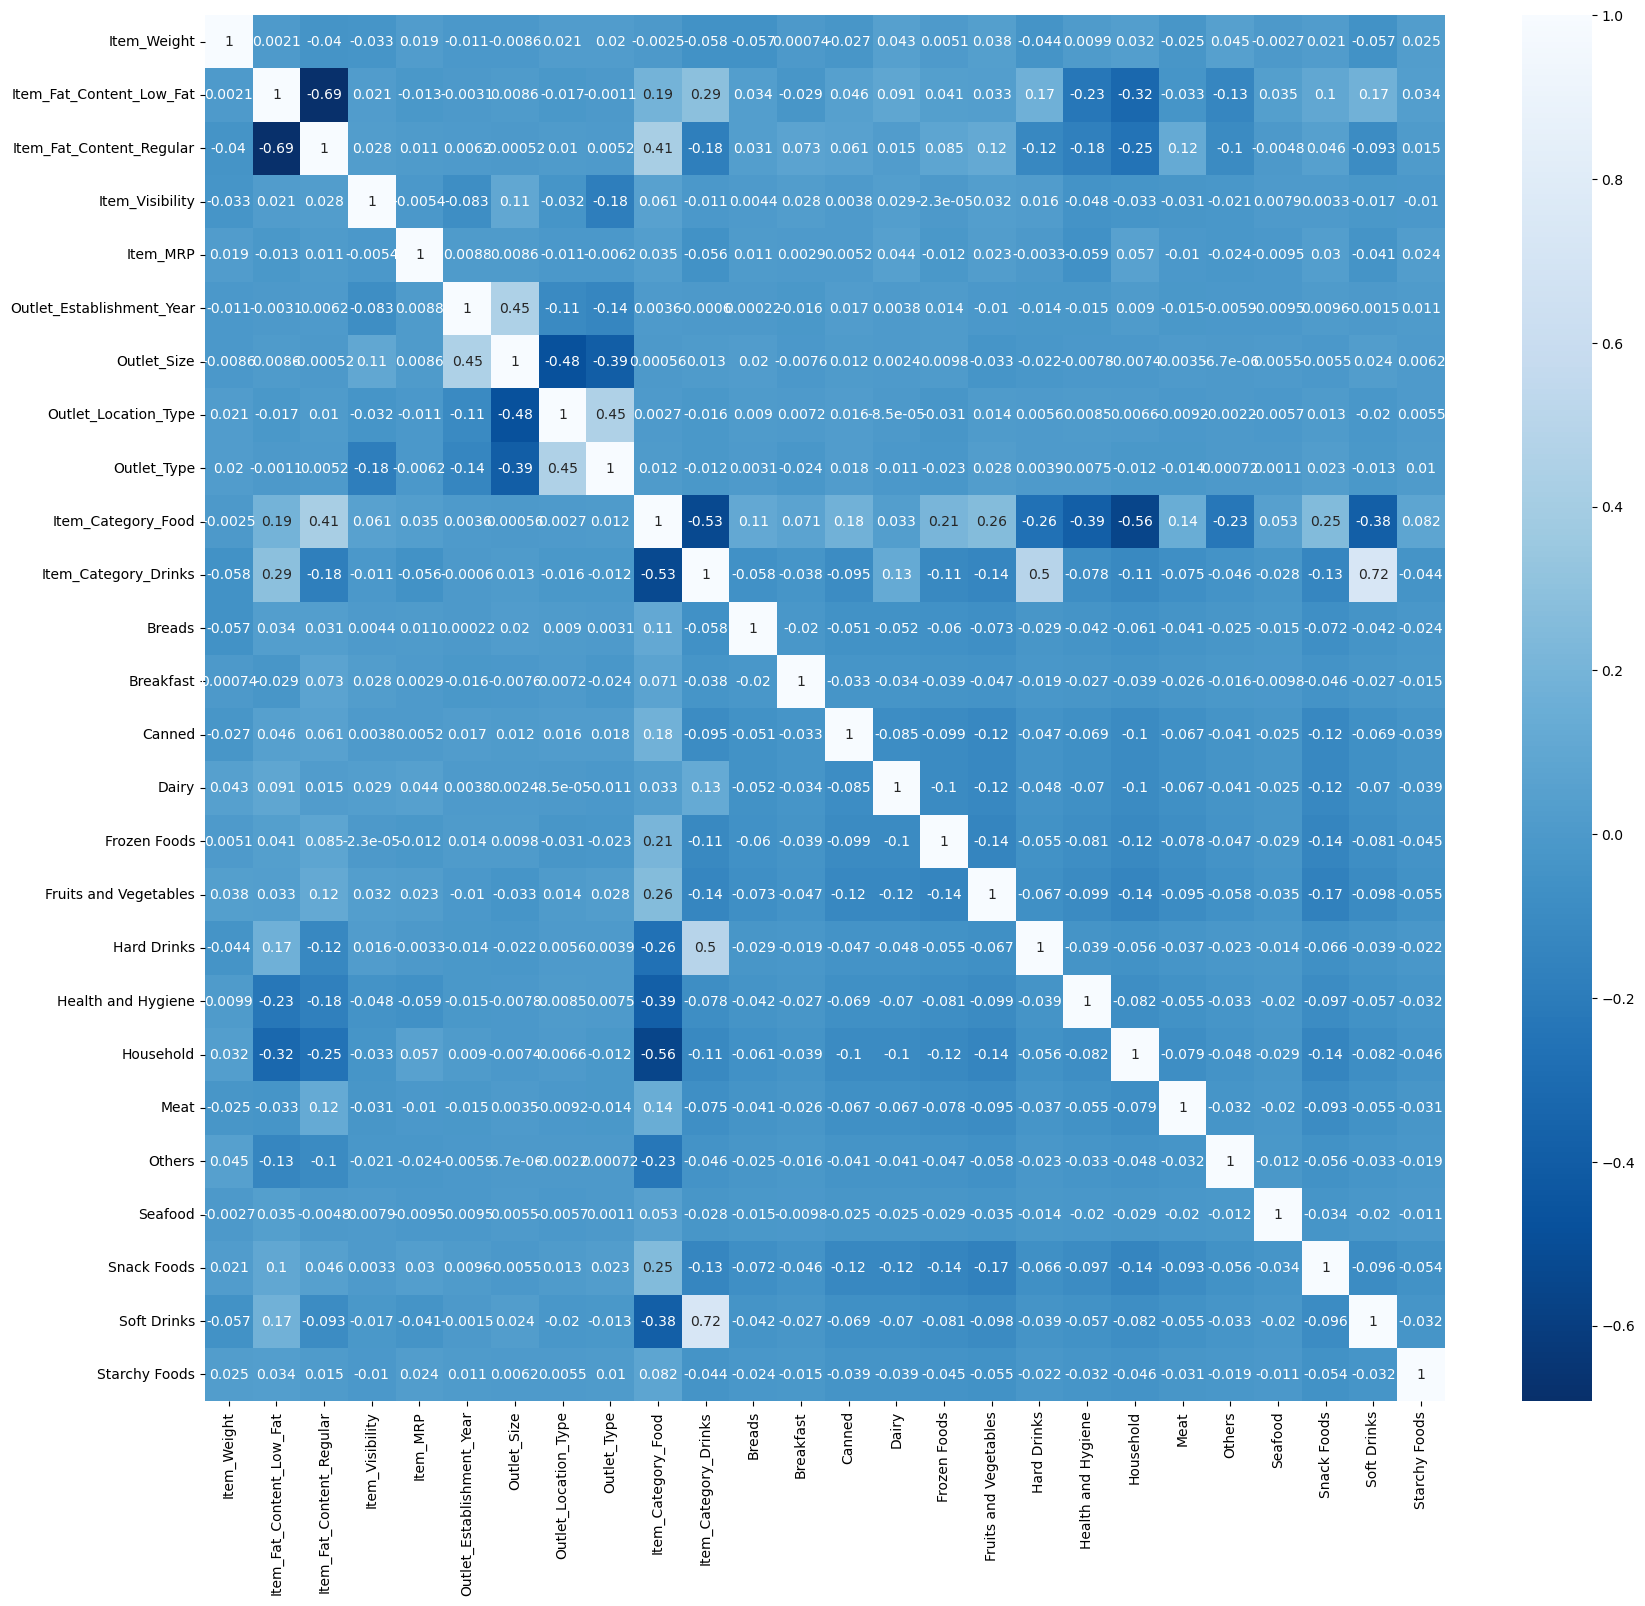

In [60]:
# find correlation between Independent and dependent attributes

plt.figure(figsize = (20,18))
sns.heatmap(X.corr(), annot = True, cmap ='Blues_r')
plt.show()

Soft Drink and Item_Category_Drinks have high correlation

In [61]:
threshold=0.5
def correlation(dataset, threshold):
    col_corr =set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >  threshold: # we are interested in absolute coeff value
                colname =corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr


In [62]:
correlation(finaldata.iloc[:,:-1],threshold)

{'Household',
 'Item_Category_Drinks',
 'Item_Fat_Content_Regular',
 'Item_Outlet_Sales',
 'Soft Drinks'}

In [63]:
# deleting the unwated data
#finaldata= data.drop(['Item_Category_Drinks','Item_Category_Non-Consumable','Item_Category_Food'], 
#                     axis= 'columns')
#finaldata.info()

In [64]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [65]:
print(model.feature_importances_)

[0.05948139 0.01160078 0.01162664 0.06514153 0.41606804 0.04828453
 0.01749413 0.01591912 0.24055336 0.00691885 0.00536355 0.00614766
 0.00305281 0.00823597 0.01041843 0.00982473 0.01394092 0.00261065
 0.00566187 0.00676968 0.00714396 0.00232864 0.00210084 0.01261527
 0.00518752 0.00550914]


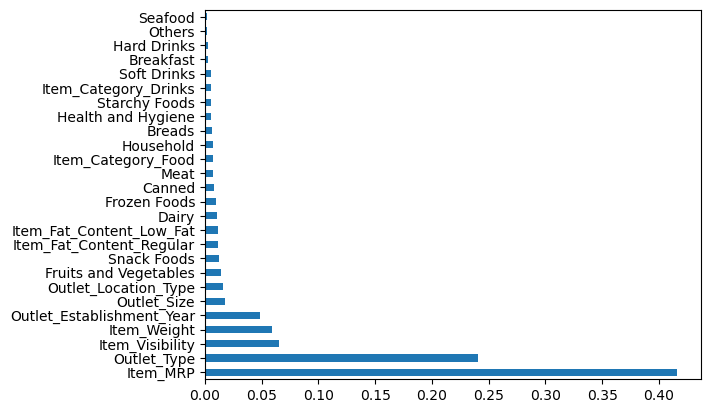

In [66]:
#plot graph of feature importances for better visualization
feat_importances =pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

#### Using the chi-test

In [67]:
#y_train.head(20)

In [68]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X,y.astype(np.int))

In [69]:
f_p_values

(array([4.18199724e+03, 1.33183768e+03, 1.60599665e+03, 8.81524126e+01,
        9.49246517e+04, 8.72018620e+01, 4.52463726e+02, 7.22613136e+02,
        1.61465366e+03, 6.84420489e+02, 2.26535804e+03, 2.71813203e+03,
        2.42437538e+03, 2.43316261e+03, 2.38165963e+03, 2.15385485e+03,
        2.02460439e+03, 2.45097130e+03, 2.23380270e+03, 2.22648161e+03,
        2.48878286e+03, 1.86265801e+03, 2.48179860e+03, 2.15975040e+03,
        2.35216799e+03, 2.82580341e+03]),
 array([7.05601886e-104, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 9.35557472e-001, 6.11117325e-007,
        2.09553959e-001, 1.75274236e-001, 4.23372896e-001, 9.99349628e-001,
        9.99999928e-001, 1.17601383e-001, 9.76872465e-001, 9.82301927e-001,
        4.25942580e-002, 1.00000000e+000, 5.22879381e-002, 9.99109813e-001,
        5.93060149e-001, 1.90357147e-010]))

In [70]:
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values.sort_values(ascending=True)

Item_MRP                      0.000000e+00
Item_Weight                  7.056019e-104
Starchy Foods                 1.903571e-10
Breads                        6.111173e-07
Meat                          4.259426e-02
Seafood                       5.228794e-02
Hard Drinks                   1.176014e-01
Canned                        1.752742e-01
Breakfast                     2.095540e-01
Dairy                         4.233729e-01
Soft Drinks                   5.930601e-01
Item_Category_Drinks          9.355575e-01
Health and Hygiene            9.768725e-01
Household                     9.823019e-01
Snack Foods                   9.991098e-01
Frozen Foods                  9.993496e-01
Fruits and Vegetables         9.999999e-01
Others                        1.000000e+00
Outlet_Type                   1.000000e+00
Outlet_Location_Type          1.000000e+00
Item_Fat_Content_Regular      1.000000e+00
Outlet_Size                   1.000000e+00
Outlet_Establishment_Year     1.000000e+00
Item_Fat_Co

<AxesSubplot:>

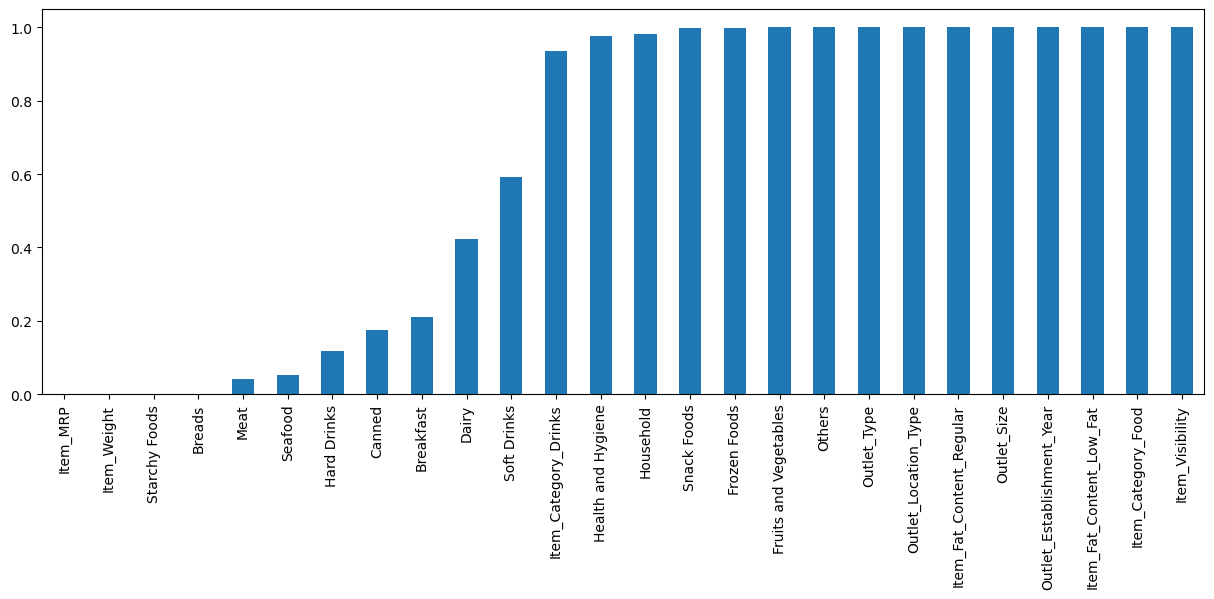

In [71]:
p_values.sort_values(ascending=True).plot.bar(figsize=(15,5))

In [72]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([2.36047383e-02, 1.76388670e-02, 2.27398056e-02, 5.70634209e-02,
       5.56728733e-01, 1.56989793e-01, 3.25505168e-02, 2.51103888e-02,
       2.62209676e-01, 1.49489477e-02, 9.30447139e-03, 5.97902091e-05,
       1.22647519e-03, 7.31431989e-03, 1.20527386e-02, 0.00000000e+00,
       1.52271889e-03, 1.03854792e-02, 0.00000000e+00, 8.10902368e-03,
       1.06104965e-02, 0.00000000e+00, 3.35016754e-03, 0.00000000e+00,
       0.00000000e+00, 1.87298802e-03])

In [73]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Item_MRP                     0.556729
Outlet_Type                  0.262210
Outlet_Establishment_Year    0.156990
Item_Visibility              0.057063
Outlet_Size                  0.032551
Outlet_Location_Type         0.025110
Item_Weight                  0.023605
Item_Fat_Content_Regular     0.022740
Item_Fat_Content_Low_Fat     0.017639
Item_Category_Food           0.014949
Dairy                        0.012053
Meat                         0.010610
Hard Drinks                  0.010385
Item_Category_Drinks         0.009304
Household                    0.008109
Canned                       0.007314
Seafood                      0.003350
Starchy Foods                0.001873
Fruits and Vegetables        0.001523
Breakfast                    0.001226
Breads                       0.000060
Frozen Foods                 0.000000
Health and Hygiene           0.000000
Others                       0.000000
Snack Foods                  0.000000
Soft Drinks                  0.000000
dtype: float

<AxesSubplot:>

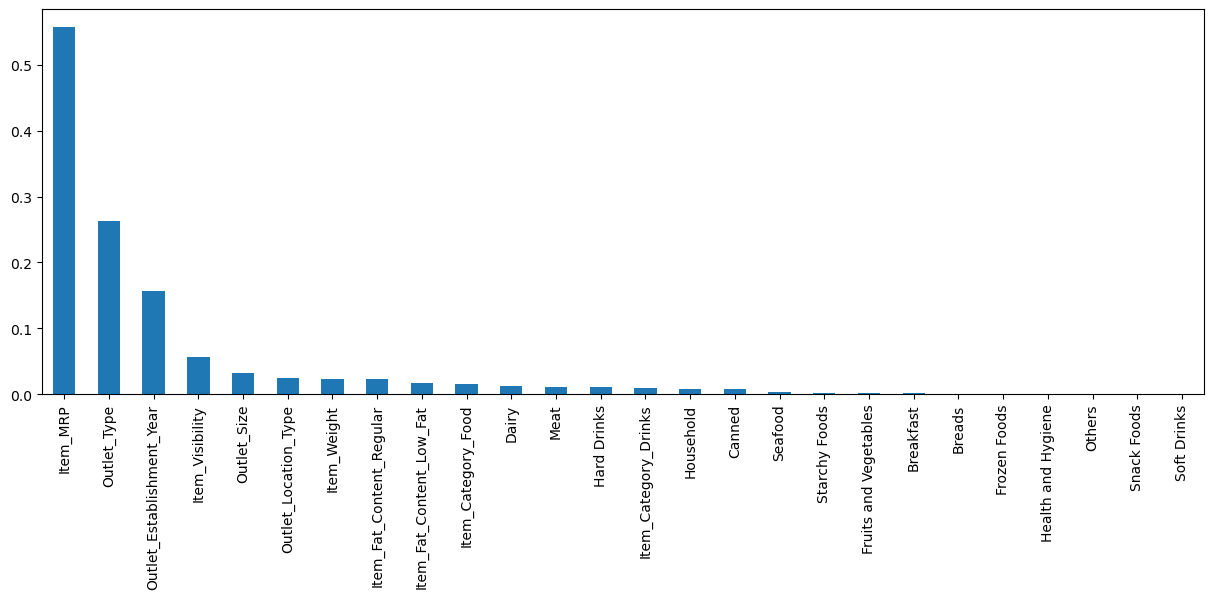

In [74]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In the above feature selection methods shows : 
Health and Hygiene, soft drinks,breakfast, others,hard drinks,Seafood are repeatedly showing up for dropping . So we are going to drop these values

In [75]:
# deleting the unwated data
finaldata= finaldata.drop(['Health and Hygiene','Soft Drinks','Breakfast','Others','Hard Drinks','Seafood'], 
                     axis= 'columns')
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4706 non-null   float64
 1   Item_Fat_Content_Low_Fat   4706 non-null   int64  
 2   Item_Fat_Content_Regular   4706 non-null   int64  
 3   Item_Visibility            4706 non-null   float64
 4   Item_MRP                   4706 non-null   float64
 5   Outlet_Establishment_Year  4706 non-null   int64  
 6   Outlet_Size                4706 non-null   int32  
 7   Outlet_Location_Type       4706 non-null   int32  
 8   Outlet_Type                4706 non-null   int32  
 9   Item_Outlet_Sales          4706 non-null   float64
 10  Item_Category_Food         4706 non-null   int64  
 11  Item_Category_Drinks       4706 non-null   int64  
 12  Breads                     4706 non-null   uint8  
 13  Canned                     4706 non-null   uint8

### Splitting our data into train and test

In [76]:
### It is always a good practice to split train and test data to avoid
#overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(finaldata.drop(labels=['Item_Outlet_Sales'], axis=1),
    finaldata['Item_Outlet_Sales'],
    test_size=0.3,
    random_state=0)

In [77]:
X_train.shape

(3294, 20)

### Standarization

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
sc=StandardScaler()

In [129]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [130]:
X_test_std

array([[ 0.44353023,  1.06592062, -0.73531778, ..., -0.22221337,
        -0.40288305, -0.14076307],
       [-1.68076319,  1.06592062, -0.73531778, ..., -0.22221337,
        -0.40288305, -0.14076307],
       [ 0.0581164 , -0.93815616,  1.35995624, ..., -0.22221337,
         2.4821099 , -0.14076307],
       ...,
       [ 1.03811618, -0.93815616, -0.73531778, ..., -0.22221337,
        -0.40288305, -0.14076307],
       [-0.2483516 , -0.93815616,  1.35995624, ..., -0.22221337,
        -0.40288305, -0.14076307],
       [-0.81699197,  1.06592062, -0.73531778, ..., -0.22221337,
        -0.40288305, -0.14076307]])

### Machine Learning Model
#### Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [134]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [137]:
y_prediction_lr=lr.predict(X_test_std)

In [138]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [140]:
print("r2_score",r2_score(y_test,y_prediction_lr))
print("mean_absolute_error",mean_absolute_error(y_test,y_prediction_lr))
print("mean_squared_error",mean_squared_error(y_test,y_prediction_lr))


r2_score 0.516177467803407
mean_absolute_error 894.3108364002667
mean_squared_error 1440956.9969875293


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_random =RandomForestRegressor()

In [79]:
### Hypeparameters

n_estimators=[int(x) for x in np.linspace(start =100,stop =1200 , num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [80]:
# Randomized search CV

# number of trees in random forest
n_estimators =[int (x)for x in np.linspace(start =100,stop=1200,num=12)]
#number od features to consider at every split
max_features=['auto','sqrt']
# maximun numebr of levels in tree
max_depth = [int(x)for x in np.linspace(5,30,num =6)]
# max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# create the random grid
random_grid ={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
rf=RandomForestRegressor()

In [84]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [86]:
rf_random.best_score_

-1205834.08545373

In [87]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

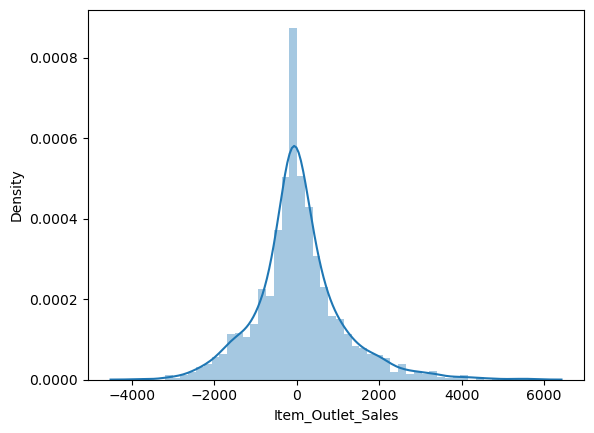

In [88]:
sns.distplot(y_test-predictions)

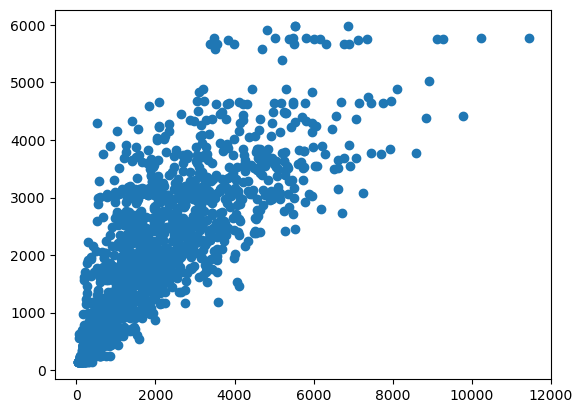

In [89]:
plt.scatter(y_test,predictions)

In [108]:
from sklearn import metrics

In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R Squared : ", metrics.r2_score(y_test,predictions))

MAE: 737.7361150116161
MSE: 1141800.781798446
RMSE: 1068.5507857834582
R Squared :  0.616623572619666


In [99]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

### Machine Learning Model
#### 1. XGBoost Regressor

In [103]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()

In [105]:
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
# predicition on training data
traing_data_prediction = xgb_regressor.predict(X_train)

In [109]:
# R squared value
r2_train = metrics.r2_score(y_train,traing_data_prediction)

In [110]:
print("R Squared value : ",r2_train)

R Squared value :  0.9179659808445961


In [115]:
# predicition on test data
test_data_prediction = xgb_regressor.predict(X_test)

In [116]:
r2_test = metrics.r2_score(y_test,test_data_prediction)

In [120]:
print("R Squared value : ",r2_train)
print('MAE:', metrics.mean_absolute_error(y_test, test_data_prediction))
print('MSE:', metrics.mean_squared_error(y_test, test_data_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_data_prediction)))

R Squared value :  0.9179659808445961
MAE: 822.203294394055
MSE: 1414124.3745882062
RMSE: 1189.1696155671848


# Save model

In [141]:
import joblib

In [143]:
joblib.dump(xgb_regressor,r"D:\DBI\2nd module\forcasting time serias\Big mart Sales Prediction\models\xgb_regressor.sav")

['D:\\DBI\\2nd module\\forcasting time serias\\Big mart Sales Prediction\\models\\xgb_regressor.sav']

In [144]:
joblib.load(r"D:\DBI\2nd module\forcasting time serias\Big mart Sales Prediction\models\xgb_regressor.sav")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)